In [1]:
#The data sets used are about Female Representation in Cinema through Bechdel test scores and cast/crew gender ratio.
#The data for the films in the movies.csv file was taken from the bechdeltest.com by the creator of the data-set.
#The oscar.csv displays Academy Awards winners and nominees from 1927 to 2021. The following categories were considered: 
#DIRECTING, BEST PICTURE, FILM EDITING, WRITING, COSTUME DESIGN, DOCUMENTARY (Feature), CINEMATOGRAPHY, SHORT FILM.

In [26]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import sys
import csv

In [2]:
#reads movies.csv but had to increase field size limit
from csv import reader
csv.field_size_limit(100000000)
opened_file = open('movies.csv', encoding='utf8')
read_file = reader(opened_file)
movie_data = list(read_file)

In [3]:
#reads oscar.csv
opened_file = open('oscar.csv', encoding='utf8')
from csv import reader
read_file = reader(opened_file)
oscar_data = list(read_file)

In [4]:
#list of every movie title in movies.csv
movie_titles = []
for row in movie_data[1:]:
    titles = str (row[1])
    movie_titles.append(titles)

In [5]:
#dictionary of year and movie title in movies.csv
year_title = {}

for row in movie_data:
        year = row[2] 
        title = row[1] 

        if year in year_title:
            year_title[year].append(title)
        else:
            year_title[year] = [title]

In [ ]:
#print every title that came out in the years 1990, 1991 and 1992
years_of_interest = ['1990', '1991', '1992']

for year in years_of_interest:
    if year in year_title:
        print(f"{year}: {year_title[year]}") 
    else:
        print(f"No movies found for {year}")

In [7]:
#list of percentages of women in the production crew for every movie in movies.csv in 2010
fem_percent_2010 = []
for row in movie_data[2586:2771]:
    percentage = str(row[21])
    fem_percent_2010.append(percentage)

In [8]:
print(fem_percent_2010)

['8.370044052863436', '14.093959731543624', '0.0', '22.78481012658228', '5.666666666666666', '7.317073170731707', '22.058823529411764', '19.35483870967742', '25.0', '7.64872521246459', '12.244897959183673', '33.33333333333333', '21.428571428571427', '12.017167381974248', '28.57142857142857', '40.0', '28.125', '15.0', '30.76923076923077', '4.5662100456621', '4.545454545454546', '9.523809523809524', '19.11764705882353', '17.647058823529413', '20.754716981132077', '8.860759493670885', '26.666666666666668', '20.0', '5.263157894736842', '9.947643979057592', '11.875', '28.57142857142857', '50.0', '13.114754098360656', '5.2356020942408374', '5.286343612334802', '12.121212121212121', '25.0', '10.0', '6.382978723404255', '14.583333333333334', '16.666666666666664', '8.0', '20.0', '0.0', '11.76470588235294', '43.47826086956522', '20.0', '31.25', '0.0', '14.285714285714285', '17.543859649122805', '12.76595744680851', '0.0', '18.0', '35.13513513513514', '10.0', '52.63157894736842', '7.3529411764705

In [9]:
#changing str to int in the fem_percent_2010 list
int_fem_2010 = fem_percent_2010
res = [eval(i) for i in int_fem_2010]
print("Modified list is: ", res)

Modified list is:  [8.370044052863436, 14.093959731543624, 0.0, 22.78481012658228, 5.666666666666666, 7.317073170731707, 22.058823529411764, 19.35483870967742, 25.0, 7.64872521246459, 12.244897959183673, 33.33333333333333, 21.428571428571427, 12.017167381974248, 28.57142857142857, 40.0, 28.125, 15.0, 30.76923076923077, 4.5662100456621, 4.545454545454546, 9.523809523809524, 19.11764705882353, 17.647058823529413, 20.754716981132077, 8.860759493670885, 26.666666666666668, 20.0, 5.263157894736842, 9.947643979057592, 11.875, 28.57142857142857, 50.0, 13.114754098360656, 5.2356020942408374, 5.286343612334802, 12.121212121212121, 25.0, 10.0, 6.382978723404255, 14.583333333333334, 16.666666666666664, 8.0, 20.0, 0.0, 11.76470588235294, 43.47826086956522, 20.0, 31.25, 0.0, 14.285714285714285, 17.543859649122805, 12.76595744680851, 0.0, 18.0, 35.13513513513514, 10.0, 52.63157894736842, 7.352941176470589, 15.277777777777779, 18.0, 8.488063660477453, 11.76470588235294, 1.282051282051282, 16.07142857

In [10]:
#how many films had x% of female crew
numbers = res

below_20_count = 0
between_20_and_40_count = 0
between_40_and_60_count = 0
between_60_and_80_count = 0
between_80_and_100_count = 0

for num in numbers:
    if num < 20:
        below_20_count += 1
    elif 20 <= num < 40:
        between_20_and_40_count += 1
    elif 40 <= num < 60:
        between_40_and_60_count += 1
    elif 60 <= num < 80:
        between_60_and_80_count += 1
    elif 80 <= num <= 100:
        between_80_and_100_count += 1

print("Numbers below 20:", below_20_count)
print("Numbers between 20 and 40:", between_20_and_40_count)
print("Numbers between 40 and 60:", between_40_and_60_count)
print("Numbers between 60 and 80:", between_60_and_80_count)
print("Numbers between 80 and 100:", between_80_and_100_count)

Numbers below 20: 120
Numbers between 20 and 40: 52
Numbers between 40 and 60: 9
Numbers between 60 and 80: 1
Numbers between 80 and 100: 3


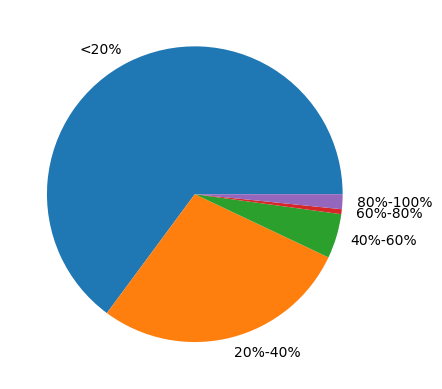

In [11]:
#pie chart of percentage of female film crew for the films of 2010 in movies.csv

y = np.array([below_20_count, between_20_and_40_count, between_40_and_60_count, between_60_and_80_count, between_80_and_100_count])
mylabels = ["<20%", "20%-40%", "40%-60%", "60%-80%", "80%-100%"]

plt.pie(y, labels=mylabels)
plt.show() 




[120, 52, 9, 1, 3]
['<20% women in the film-crew', '20%-40% women in the film-crew', '40%-60% women in the film-crew', '60%-80% women in the film-crew', '80%-100% women in the film-crew']


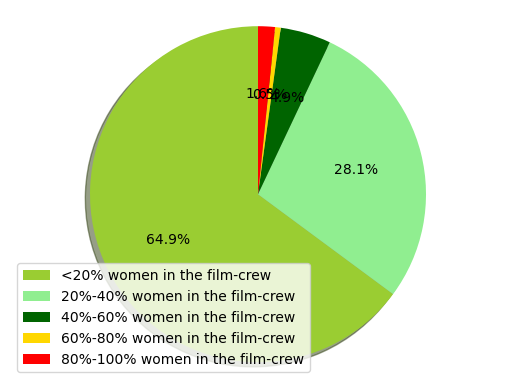

In [12]:
#pie chart of percentage of female film crew for the films of 2010 in movies.csv
#tried to get the percantages outside of the pie chart but got a "disastrous" result for every attempt
#experimented with color and visual aspects

import matplotlib.pyplot as plt
topic = ["<20% women in the film-crew", "20%-40% women in the film-crew", "40%-60% women in the film-crew", "60%-80% women in the film-crew", "80%-100% women in the film-crew"]
Postive_percentage = [below_20_count, between_20_and_40_count, between_40_and_60_count, between_60_and_80_count, between_80_and_100_count]


sizes = Postive_percentage
print(sizes)
labels = list(topic)
print(labels)
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(sizes, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

In [13]:
#putting every film title from the years 2000-2010 in a list#

films_2000_2010 = []

for row in movie_data[1:]:
    title = row[1]  
    year = row[2]   

    if 2000 <= int(year) <= 2010:
        films_2000_2010.append(title)

In [14]:
#selecting only the bechdel test score for those movies

bechdel_scores_1970_2020 = []

for row in movie_data[1:]:
    year = int(row[2])
    bechdel_score = int(row[3])  

    if 1970 <= year <= 2020:
        bechdel_scores_1970_2020.append(bechdel_score)

In [15]:
#how often each score is in the list
numbers = bechdel_scores_1970_2020

bs_0 = 0
bs_1 = 0
bs_2 = 0
bs_3 = 0

for num in numbers:
    if num == 0:
        bs_0 += 1
    elif num == 1:
        bs_1 += 1
    elif num == 2:
        bs_2 += 1
    elif num == 3:
        bs_3 += 1

print("How many films failed the Bechdel test:", bs_0)
print("How many films had at least two named women in it:", bs_1)
print("How many films had two named women that talked to each other:", bs_2)
print("How many films had two named women that talked to each other about anything that isn't a man:", bs_3)

How many films failed the Bechdel test: 552
How many films had at least two named women in it: 1452
How many films had two named women that talked to each other: 612
How many films had two named women that talked to each other about anything that isn't a man: 3553


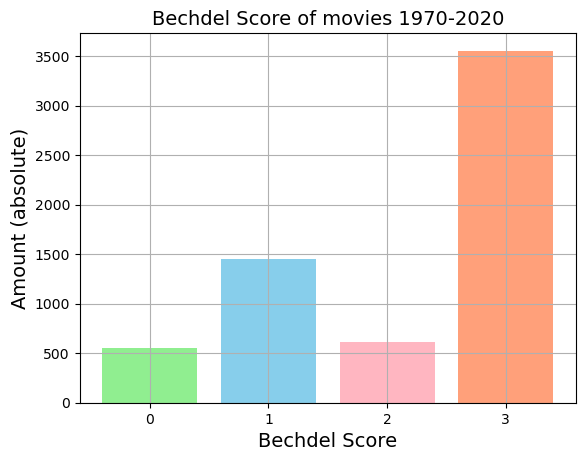

In [16]:
#bar diagram about the bechdel scores 1970-2020

data = {'Bechdel Score': ['0', '1', '2', '3'],
        'Amount': [bs_0, bs_1, bs_2, bs_3]
       }
df = pd.DataFrame(data)

colors = ['lightgreen','skyblue','lightpink','lightsalmon']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score of movies 1970-2020', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

In [17]:
#selecting only the bechdel test score for those movies

bechdel_scores_1900_1950 = []

for row in movie_data[1:]:
    year = int(row[2])
    bechdel_score = int(row[3])  

    if 1900 <= year <= 1950:
        bechdel_scores_1900_1950.append(bechdel_score)

In [18]:
#how often each score is in the list
numbers = bechdel_scores_1900_1950

bs_0_19 = 0
bs_1_19 = 0
bs_2_19 = 0
bs_3_19 = 0

for num in numbers:
    if num == 0:
        bs_0_19 += 1
    elif num == 1:
        bs_1_19 += 1
    elif num == 2:
        bs_2_19 += 1
    elif num == 3:
        bs_3_19 += 1

print("How many films failed the Bechdel test:", bs_0_19)
print("How many films had at least two named women in it:", bs_1_19)
print("How many films had two named women that talked to each other:", bs_2_19)
print("How many films had two named women that talked to each other about anything that isn't a man:", bs_3_19)

How many films failed the Bechdel test: 106
How many films had at least two named women in it: 91
How many films had two named women that talked to each other: 86
How many films had two named women that talked to each other about anything that isn't a man: 213


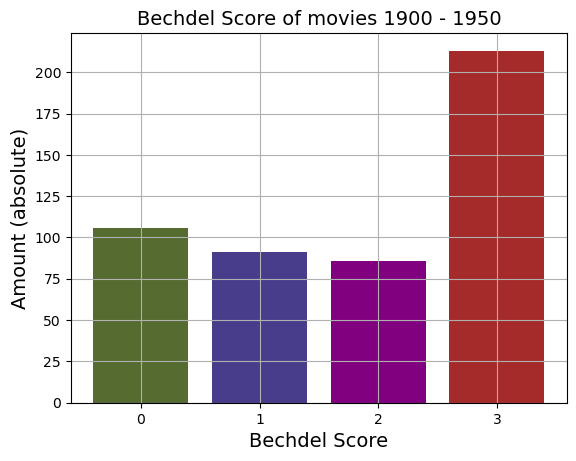

In [19]:
#bar diagram about the bechdel scores 1970-2020

data = {'Bechdel Score': ['0', '1', '2', '3'],
        'Amount': [bs_0_19, bs_1_19, bs_2_19, bs_3_19]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','darkslateblue','purple','brown']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score of movies 1900 - 1950', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

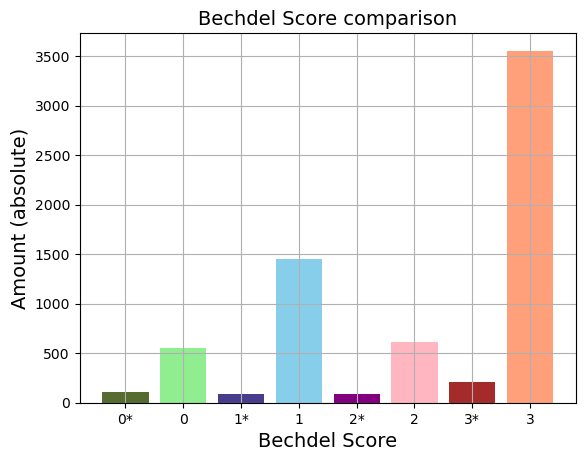

In [20]:
#bar diagram comparing the two visualizations

data = {'Bechdel Score': ['0*', '0', '1*', '1', '2*', '2', '3*', '3'],
        'Amount': [bs_0_19, bs_0, bs_1_19, bs_1, bs_2_19, bs_2, bs_3_19, bs_3]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','lightgreen','darkslateblue','skyblue','purple','lightpink','brown', 'lightsalmon']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score comparison', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

In [21]:
#conclusion: not enought films in the first list from 1900-1950 which makes the comparison rather meaningless
#maybe with perceentages it would be a better diagram

In [22]:
total_count = bs_0 + bs_1 + bs_2 + bs_3
total_count_19 = bs_0_19 + bs_1_19 + bs_2_19 + bs_3_19

In [23]:
normalized_bs_0_19 = bs_0_19 / total_count_19
normalized_bs_0 = bs_0 / total_count
normalized_bs_1_19 = bs_1_19 / total_count_19
normalized_bs_1 = bs_1 / total_count
normalized_bs_2_19 = bs_2_19 / total_count_19
normalized_bs_2 = bs_2 / total_count
normalized_bs_3_19 = bs_3_19 / total_count_19
normalized_bs_3 = bs_3 / total_count

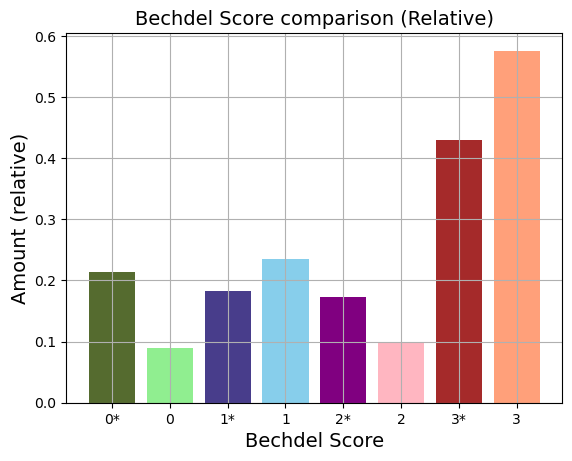

In [24]:
data = {'Bechdel Score': ['0*', '0', '1*', '1', '2*', '2', '3*', '3'],
        'Percent': [normalized_bs_0_19, normalized_bs_0, normalized_bs_1_19, normalized_bs_1,
                   normalized_bs_2_19, normalized_bs_2, normalized_bs_3_19, normalized_bs_3]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','lightgreen','darkslateblue','skyblue','purple','lightpink','brown', 'lightsalmon']

plt.bar(df['Bechdel Score'], df['Percent'], color=colors)
plt.title('Bechdel Score comparison (Relative)', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (relative)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
<tr>
<td><strong>asterisk</strong></td>
<td>Value 1900-1950</td>
</tr>
<tr>
<td><strong>no asterisk</strong></td>
<td>Value 1970-2020</td>
</tr>
</tbody>
</table>

In [ ]:
#finding out if the oscar winners pass the bechdel test - and what score they got
#first step was creating a list of the oscar winners as the file also includes nominees:

def get_data_for_status(file_path, status_column, target_status):
    df = pd.read_csv(file_path)
    
    filtered_rows = df[df[status_column] == target_status]
    
    result_list = filtered_rows.to_dict(orient='records')
    
    return result_list

file_path = 'oscar.csv'  # replace with the actual file path
status_column = 'status'  # replace with the actual column name
target_status = 'winner'

oscar_winners = get_data_for_status(file_path, status_column, target_status)

for entry in oscar_winners:
    print(entry)

In [ ]:
#next step is finding out which oscar winners are in movies.csv - if there are none it will print "no matching entries"

def check_film_titles(entries, movies_file):
    movies_df = pd.read_csv(movies_file)

    matching_entries = []

    for entry in entries:
        film_title = entry['film']

        if any(movies_df['title'] == film_title):
            matching_entries.append(entry)

    return matching_entries

entries_list = oscar_winners

movies_file_path = 'movies.csv'
matching_entries = check_film_titles(entries_list, movies_file_path)

if matching_entries:
    for entry in matching_entries:
        print(entry)
else:
    print("No matching entries.")

In [ ]:
#This list then revealed that there are sometimes multiple entries for each film as it won for different categories.
#I choose to use the list as is because if a film got 5 oscars it should count more than a film that got 1 oscar.

In [ ]:
#make a list consisting of the title and the bt_score in movies.csv

def get_data_for_bechdel(file_path):
    df = pd.read_csv(file_path)
    
    selected_columns = df[['title', 'bt_score']]
    
    result_list = selected_columns.to_dict(orient='records')
    
    return result_list

bechdel_movies = get_data_for_bechdel('movies.csv')
for m in bechdel_movies:
    print(m)

In [ ]:
#add the corresponding bt_score to every entry in the list matching_entries

def get_corresponding_bechdel_score(movie_name):
    for bt_movie in bechdel_movies:
        if bt_movie["title"] == movie_name:
            return bt_movie["bt_score"]

for movie in matching_entries:
    movie["bt_score"] = get_corresponding_bechdel_score(movie["film"])
    print(movie)

In [ ]:
#list of only the numbers of the bt score and nothing else

list_of_oscar_bt_scores = []

for row in matching_entries:
    list_of_oscar_bt_scores.append(row["bt_score"])

print(list_of_oscar_bt_scores)

In [74]:
#how often each score is in the list
numbers = list_of_oscar_bt_scores

bt_oscars_0 = 0
bt_oscars_1 = 0
bt_oscars_2 = 0
bt_oscars_3 = 0

for num in numbers:
    if num == 0:
        bt_oscars_0 += 1
    elif num == 1:
        bt_oscars_1 += 1
    elif num == 2:
        bt_oscars_2 += 1
    elif num == 3:
        bt_oscars_3 += 1

print("How many films failed the Bechdel test:", bt_oscars_0)
print("How many films had at least two named women in it:", bt_oscars_1)
print("How many films had two named women that talked to each other:", bt_oscars_2)
print("How many films had two named women that talked to each other about anything that isn't a man:", bt_oscars_3)

How many films failed the Bechdel test: 51
How many films had at least two named women in it: 173
How many films had two named women that talked to each other: 63
How many films had two named women that talked to each other about anything that isn't a man: 300


[51, 173, 63, 300]
['Failed the Bechdel Test', 'Bechdel Test Score 1', 'Bechdel Test Score 2', 'Bechdel Test Score 3']


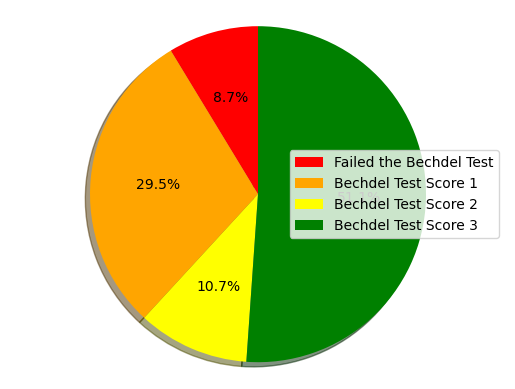

In [76]:
#pie chart of the bechdel test score of oscar winning movies

import matplotlib.pyplot as plt
topic = ["Failed the Bechdel Test", "Bechdel Test Score 1", "Bechdel Test Score 2", "Bechdel Test Score 3"]
Postive_percentage = [bt_oscars_0, bt_oscars_1, bt_oscars_2, bt_oscars_3]


sizes = Postive_percentage
print(sizes)
labels = list(topic)
print(labels)
colors = ['red', 'orange', 'yellow', 'green']
plt.pie(sizes, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

In [96]:
my_list = oscar_winners

number_of_oscar_winners = len(my_list)



my_list = matching_entries

number_of_matchingentries = len(my_list)


print(f"The result is not very reliable as I could only consider the Bechdel scores available in movies.csv -") 
print(f"and as there were {number_of_oscar_winners} oscar winners in oscars.csv and only {number_of_matchingentries} matching entries")
print(f"in both files the pie chart should not be taken as complete, reliable data as it only") 
print(f"represents roughly 50% of the oscar winners data.")

The result is not very reliable as I could only consider the Bechdel scores available in movies.csv -
and as there were 1170 oscar winners in oscars.csv and only 587 matching entries
in both files the pie chart should not be taken as complete, reliable data as it only
represents roughly 50% of the oscar winners data.


In [102]:
print(f"Further I would like to include the countries provided in movies.csv and maybe locate a regional tendency towards certain bechdel scores. Maybe it would also be possible to look at regional trends (over time) in this regard. If I had to describe it in one research question it could be: How did the result of the Bechdel Test score of various movies develop over the past century?")

Further I would like to include the countries provided in movies.csv and maybe locate a regional tendency towards certain bechdel scores. Maybe it would also be possible to look at regional trends (over time) in this regard. If I had to describe it in one research question it could be: How did the result of the Bechdel Test score of various movies develop over the past century?


In [104]:
print(f"What would also be interesting to know would be the correspondence of the percentage of women in the crew and the resulting bechdel score - or maybe the gender of the director and the resulting bechdel score.")

What would also be interesting to know would be the correspondence of the percentage of women in the crew and the resulting bechdel score - or maybe the gender of the director and the resulting bechdel score.


In [105]:
print("Or if I would add on to my research-question it could also be a line chart of the relative amount of female directors over time even though I think it could prove difficult to get this information from the movies.csv file")

Or if I would add on to my research-question it could also be a line chart of the relative amount of female directors over time even though I think it could prove difficult to get this information from the movies.csv file
